In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

import kaggle


In [2]:
data = pd.read_csv("data/Arrests_Presented_and_Prosecutions.csv")
data.head()

/var/folders/22/1g2r80910k72xfwpntjvyjb80000gn/T/ipykernel_20483/893801417.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/Arrests_Presented_and_Prosecutions.csv")


,ID,Incident Number,Arrest Date,Court Number,Case Filed,Status,Suspect Charge List,Case Type
0,1,21650836,2011/12/01,2085441,N,Other Action,",11352,",Felony
1,2,110000346,2011/01/01,11000030,N,Discharge Only,",21658(A),23152(A),11550(A),",Misdemeanor
2,3,Z20110101-11000037,2011/01/01,11000037,Y,Filed,",23152(A),23152(B),12500(A),",Misdemeanor
3,4,Z20110101-11000039,2011/01/01,11000039,Y,Filed,",23152(A),23152(B),14601.2(A),",Misdemeanor
4,5,Z20110101-11000046,2011/01/01,11000046,Y,Filed,",14601(A),23152(A),23152(B),",Misdemeanor


In [3]:
data['Suspect Charge List'] = data['Suspect Charge List'].apply(lambda x: x.strip(',').split(','))
data = data.dropna()
data.head()

,ID,Incident Number,Arrest Date,Court Number,Case Filed,Status,Suspect Charge List,Case Type
0,1,21650836,2011/12/01,2085441,N,Other Action,[11352],Felony
1,2,110000346,2011/01/01,11000030,N,Discharge Only,"[21658(A), 23152(A), 11550(A)]",Misdemeanor
2,3,Z20110101-11000037,2011/01/01,11000037,Y,Filed,"[23152(A), 23152(B), 12500(A)]",Misdemeanor
3,4,Z20110101-11000039,2011/01/01,11000039,Y,Filed,"[23152(A), 23152(B), 14601.2(A)]",Misdemeanor
4,5,Z20110101-11000046,2011/01/01,11000046,Y,Filed,"[14601(A), 23152(A), 23152(B)]",Misdemeanor


In [4]:
#This is for the case of removing the suspect charge list and training using other metrics

# Select the necessary columns
data_no_charge = data[['Case Filed', 'Case Type', 'Arrest Date', 'Status']].copy()

# Convert 'Arrest Date' to datetime
data_no_charge['Arrest Date'] = pd.to_datetime(data_no_charge['Arrest Date'])

# Define a reference date
reference_date = pd.to_datetime("2010-12-01")

# Subtract the reference date to calculate days
data_no_charge['Arrest Date'] = (data_no_charge['Arrest Date'] - reference_date).dt.days

# Encode categorical variables
label_encoder = LabelEncoder()
data_no_charge['Case Filed'] = label_encoder.fit_transform(data_no_charge['Case Filed'])
data_no_charge['Case Type'] = label_encoder.fit_transform(data_no_charge['Case Type'])

data_no_charge.head()

,Case Filed,Case Type,Arrest Date,Status
0,0,0,365,Other Action
1,0,1,31,Discharge Only
2,1,1,31,Filed
3,1,1,31,Filed
4,1,1,31,Filed


In [5]:
#setting training and test data
x_vals = data_no_charge.drop(columns=['Status'])
y_vals = data['Status']
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=21)

In [6]:
#Here is the model for random forest
model = RandomForestClassifier(n_estimators=20, random_state=21)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
#This function is super helpful - look for similar ones for other classification models
report = classification_report(y_test, y_pred, target_names=['Other Action', 'Discharge Only', 'Filed'])

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.8249849729513123

Classification Report:
                 precision    recall  f1-score   support

  Other Action       0.73      0.87      0.80      3915
Discharge Only       0.98      1.00      0.99      4600
         Filed       0.35      0.15      0.21      1467

      accuracy                           0.82      9982
     macro avg       0.69      0.68      0.67      9982
  weighted avg       0.79      0.82      0.80      9982



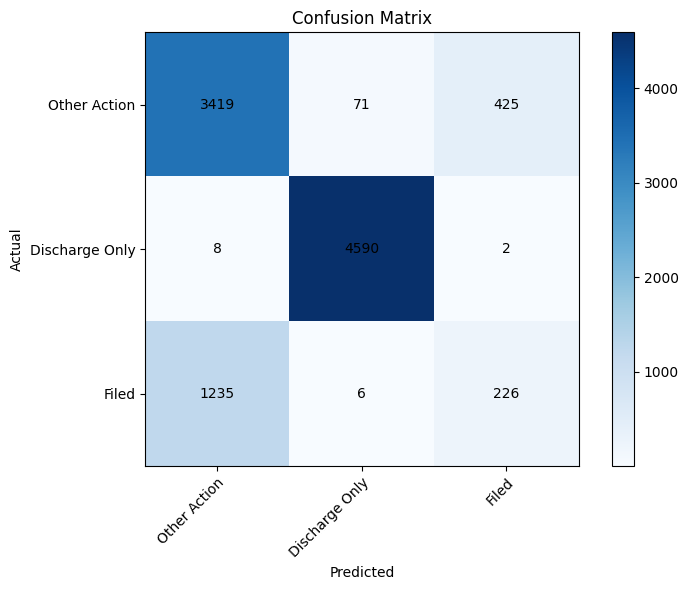

In [7]:
# Creation of the heatmap showing the distribution of predictions
cm = confusion_matrix(y_test, y_pred)
class_names = ['Other Action', 'Discharge Only', 'Filed']

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Blues')

ax.set_xticks(range(len(class_names)))
ax.set_yticks(range(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

# Add a colorbar for reference
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

In [8]:
#This is the example with one hote encoded the Suspect Charge List


data_with_charge = data[['ID', 'Case Filed', 'Case Type', 'Arrest Date', 'Status', 'Suspect Charge List']].copy()

# Convert 'Arrest Date' to datetime
data_with_charge['Arrest Date'] = pd.to_datetime(data_with_charge['Arrest Date'])

# Define a reference date
reference_date = pd.to_datetime("2010-12-01")

# Subtract the reference date to calculate days
data_with_charge['Arrest Date'] = (data_with_charge['Arrest Date'] - reference_date).dt.days

# Encode categorical variables
label_encoder = LabelEncoder()
data_with_charge['Case Filed'] = label_encoder.fit_transform(data_with_charge['Case Filed'])
data_with_charge['Case Type'] = label_encoder.fit_transform(data_with_charge['Case Type'])

data_with_charge.head()

,ID,Case Filed,Case Type,Arrest Date,Status,Suspect Charge List
0,1,0,0,365,Other Action,[11352]
1,2,0,1,31,Discharge Only,"[21658(A), 23152(A), 11550(A)]"
2,3,1,1,31,Filed,"[23152(A), 23152(B), 12500(A)]"
3,4,1,1,31,Filed,"[23152(A), 23152(B), 14601.2(A)]"
4,5,1,1,31,Filed,"[14601(A), 23152(A), 23152(B)]"


In [9]:
charges = set(charge for sublist in data["Suspect Charge List"] for charge in sublist)

encoded_data = pd.DataFrame(
    {charge: data["Suspect Charge List"].apply(lambda x: 1 if charge in x else 0) for charge in charges}
)

data_with_charge = pd.concat([data_with_charge.drop(columns=["Suspect Charge List"]), encoded_data], axis=1)
data_with_charge.head()

,ID,Case Filed,Case Type,Arrest Date,Status,422.77A,22910(A),289(A)1A,289(J),466.6(A),...,40302,664/286K,14600(A),25400(F),626.6(A),289(D)1,30315,209(B)(1),12220(A),12305
0,1,0,0,365,Other Action,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,31,Discharge Only,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,31,Filed,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,31,Filed,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,31,Filed,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x_vals = data_with_charge.drop(columns=['ID', 'Status'])
y_vals = data_with_charge['Status']
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=21)

In [11]:
model = RandomForestClassifier(n_estimators=20, random_state=21)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
#This function is super helpful - look for similar ones for other classification models
report = classification_report(y_test, y_pred, target_names=['Other Action', 'Discharge Only', 'Filed'])

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.8401122019635343

Classification Report:
                 precision    recall  f1-score   support

  Other Action       0.78      0.82      0.80      3915
Discharge Only       0.98      0.99      0.99      4600
         Filed       0.49      0.42      0.45      1467

      accuracy                           0.84      9982
     macro avg       0.75      0.74      0.75      9982
  weighted avg       0.83      0.84      0.84      9982



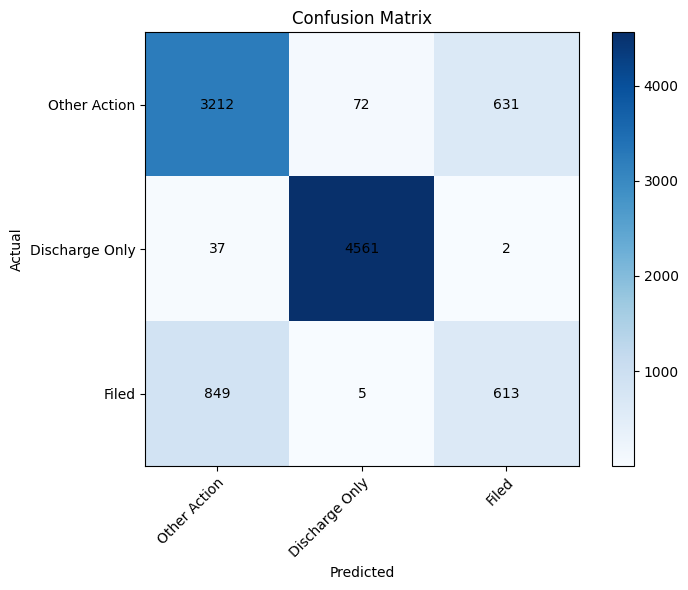

In [12]:
# Creation of the heatmap showing the distribution of predictions
cm = confusion_matrix(y_test, y_pred)
class_names = ['Other Action', 'Discharge Only', 'Filed']

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Blues')

ax.set_xticks(range(len(class_names)))
ax.set_yticks(range(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

# Add a colorbar for reference
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

In [13]:
# This is the example where k means clustering is used to cluster groups of charge lists

#Exploding the data to have new entries for every charge
expanded_with_charge_list = data.explode("Suspect Charge List").rename(columns={"Suspect Charge List": "Charge"})
expanded_with_charge_list.head()

,ID,Incident Number,Arrest Date,Court Number,Case Filed,Status,Charge,Case Type
0,1,21650836,2011/12/01,2085441,N,Other Action,11352,Felony
1,2,110000346,2011/01/01,11000030,N,Discharge Only,21658(A),Misdemeanor
1,2,110000346,2011/01/01,11000030,N,Discharge Only,23152(A),Misdemeanor
1,2,110000346,2011/01/01,11000030,N,Discharge Only,11550(A),Misdemeanor
2,3,Z20110101-11000037,2011/01/01,11000037,Y,Filed,23152(A),Misdemeanor


In [14]:
#Encode variables
label_encoders = {}
for col in ["Case Filed", "Case Type"]:
    label_encoders[col] = LabelEncoder()
    expanded_with_charge_list[col] = label_encoders[col].fit_transform(expanded_with_charge_list[col])

# Convert dates
expanded_with_charge_list["Arrest Date"] = pd.to_datetime(expanded_with_charge_list["Arrest Date"]).map(pd.Timestamp.toordinal)

features = expanded_with_charge_list[["Arrest Date", "Case Filed", "Case Type"]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

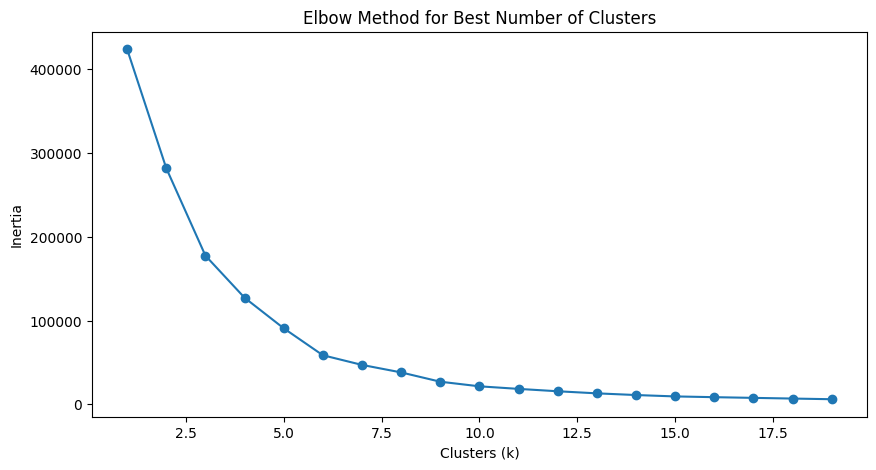

In [15]:
# Elbow Method
cluster_range = range(1, 20)  # Limit k to the number of samples
inertia = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker="o")
plt.title("Elbow Method for Best Number of Clusters")
plt.xlabel("Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=9, random_state=42)
expanded_with_charge_list["Cluster"] = kmeans.fit_predict(features_scaled)

expanded_with_charge_list.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,ID,Incident Number,Arrest Date,Court Number,Case Filed,Status,Charge,Case Type,Cluster
0,1,21650836,734472,2085441,0,Other Action,11352,0,1
1,2,110000346,734138,11000030,0,Discharge Only,21658(A),1,7
1,2,110000346,734138,11000030,0,Discharge Only,23152(A),1,7
1,2,110000346,734138,11000030,0,Discharge Only,11550(A),1,7
2,3,Z20110101-11000037,734138,11000037,1,Filed,23152(A),1,8


In [17]:
# Show the charges in each cluster
charge_groups = expanded_with_charge_list.groupby("Cluster")["Charge"].apply(list)

for cluster, charges in charge_groups.items():
    print(f"Cluster {cluster}:")
    print(", ".join(charges))
    print("\n")

Cluster 0:
NOTINTBL, 422, 211, 245(A)1, 664/187A, 182(A)1, 459, 496(A), 496(A), 25400A2, 422.6(A), 29800A1, 25850(A), 11350(A), 148(A)1, 243(A), 245(A)1, 422, 243(D), 211, 664/187A, 182(A)1, NOTINTBL, NOTINTBL, 25400A2, NOTINTBL, 11351, 25400A1, 25850(A), 290(B), 11364(A), 10852, 594(B)1, 459.5(A), 182(A)1, 245(A)1, 273.5(A), 11352(A), 12022.1, 166(A)4, 466, 12022.1, 11364(A), 459, 459, 148(A)1, 466, 496(A), 496(A), 245(A)1, 422, 245(A)1, 12500(A), 11364(A), 11379(A), 11378, NOTINTBL, 12022.1, 459, 14601.1(A), 664/211, 166(A)4, 148.9(A), 496(A), 4060, 594(B)1, 459, 246.3(A), 30305A1, 29800A1, 245(A)4, 242, 664/187A, 243(D), 664245A1, 422, 182(A)1, 664/211, 459, 11378, 11364(A), 11379(A), 664/211, NOTINTBL, 242, 245(A)1, 496(A), 10852, NOTINTBL, 460(B), 466, 25850(A), 29800A1, 11377(A), 11370.1(A), 459, 594(B)1, NOTINTBL, 496(A), 484G(A), 10851(A), 496D(A), 466, 148.9(A), 459, 11364(A), 466, 459, 487(A), 459, 487(A), NOTINTBL, 487(A), 664/459, 459, 182(A)1, 496(A), 459, 496(A), 182(A)1,

In [18]:
#Use random forest on each individual cluster

expanded_with_charge_list["Status"] = LabelEncoder().fit_transform(expanded_with_charge_list["Status"])

# Split the data by clusters
results = {}
for cluster in expanded_with_charge_list["Cluster"].unique():
    cluster_data = expanded_with_charge_list[expanded_with_charge_list["Cluster"] == cluster]

    X = cluster_data[["Arrest Date", "Case Filed", "Case Type"]]
    y = cluster_data["Status"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=["Other Action", "Discharge Only", "Filed"], zero_division=0)
    
    # Keep results for each cluster
    results[cluster] = {"accuracy": accuracy, "report": report}

# Print results
for cluster, metrics in results.items():
    print(f"Cluster {cluster}:")
    if isinstance(metrics, str):
        print(metrics)
    else:
        print(f"Accuracy: {metrics['accuracy']:.2f}")
        print("Classification Report:")
        print(metrics["report"])
    print("\n")

ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter